**Submission Pertama**
- **Nama:** Aulia Afifah
- **Email:** auliaafifah2205@gmail.com
- **ID Dicoding:** auliaafifah253



# Membaca data

mengimpor semua library yang dibutuhkan

In [1]:
import pandas as pd

%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

mempersiapkan data

In [2]:
df = pd.read_csv('review_dana_labelled.csv')
df.head()

,userName,score,at,content,sentimen
0,Elisya Kasni,5,2024-02-15 11:24:56,Bagus,POSITIVE
1,Rusman Man,2,2024-02-15 11:24:03,Dana mmg keren mantap.,POSITIVE
2,Qiliw Sadega,1,2024-02-15 11:23:34,Saya ngajuin upgrade dana premium krna ktp say...,NEGATIVE
3,Kijutjrv2 Kijut,3,2024-02-15 11:22:46,Kocak mana diskon nya ml malah eror segala kag...,NEGATIVE
4,Fifi Alfiyah,1,2024-02-15 11:21:34,Saldo hilang karena no lama Hilang ganti no sa...,NEGATIVE


# Analisis data

Melakukan tahap analisis data untuk memahami struktur dan distribusi data seperti akan mengecek informasi, emnghapus kolom, berapa jumlah data_train dan data_test, komposisi label atau target sentimen pada data, menggunakan fungsi world cloud untuk melihat term yang muncul pada data, dan lainnya.

In [3]:
df.drop(columns=['userName', 'score', 'at'], axis=1, inplace=True)
df.head()

,content,sentimen
0,Bagus,POSITIVE
1,Dana mmg keren mantap.,POSITIVE
2,Saya ngajuin upgrade dana premium krna ktp say...,NEGATIVE
3,Kocak mana diskon nya ml malah eror segala kag...,NEGATIVE
4,Saldo hilang karena no lama Hilang ganti no sa...,NEGATIVE


In [4]:
df.describe()

,content,sentimen
count,50000,50000
unique,31701,3
top,mantap,POSITIVE
freq,1923,26555


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   50000 non-null  object
 1   sentimen  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


cek jumlah data pada data

In [6]:
print(df.shape)

(50000, 2)


menghitung jumlah masing-masing variabel (positif, netral, dan negatif) pada kolom sentimen

In [7]:
df['sentimen'].value_counts()

sentimen
POSITIVE    26555
NEGATIVE    17073
NEUTRAL      6372
Name: count, dtype: int64

<Axes: xlabel='sentimen'>

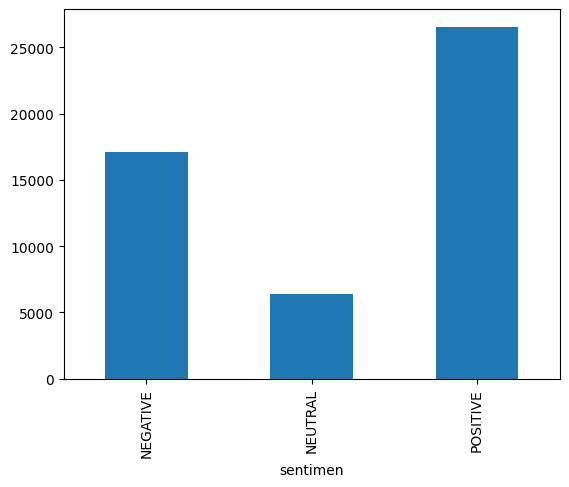

In [8]:
df.groupby('sentimen').size().plot(kind='bar')

**Pembagian data**

Setelah melakukan analisis awal pada data, langkah berikutnya adalah membagi data menjadi data latih (train) dan data uji (test). 20% dari data akan digunakan sebagai data uji dan 80% sebagai data latih.

In [9]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [10]:
print(f"Data train sebesar: {train_df.shape}")
print(f"Data test sebesar: {test_df.shape}")

Data train sebesar: (40000, 2)
Data test sebesar: (10000, 2)


Data Latih (Train Data): Digunakan untuk melatih model machine learning.

In [11]:
train_df.head()

,content,sentimen
39087,trmksh DANA.aplikasibini sangat membantu & ber...,POSITIVE
30893,sangat membantu perkerjan,POSITIVE
45278,Alhamdulullah,POSITIVE
16398,mantappp,POSITIVE
13653,bagus,POSITIVE


Data Uji (Test Data): Digunakan untuk menguji dan mengevaluasi kinerja model.

In [12]:
test_df.head()

,content,sentimen
33553,Memudahkan pembayaran,POSITIVE
9427,terimakasih Dana dengan adanya aplikasi ini sa...,POSITIVE
199,gimana ini dana? tiba2 saldo saya diambil oleh...,NEGATIVE
12447,"Akun saya hilang, karna kartunya mati. Mengapa...",NEGATIVE
39489,"Nama dana tidak sesuai, padahal awal daftar sa...",NEGATIVE


melihat panjang teks dalam data train dan test

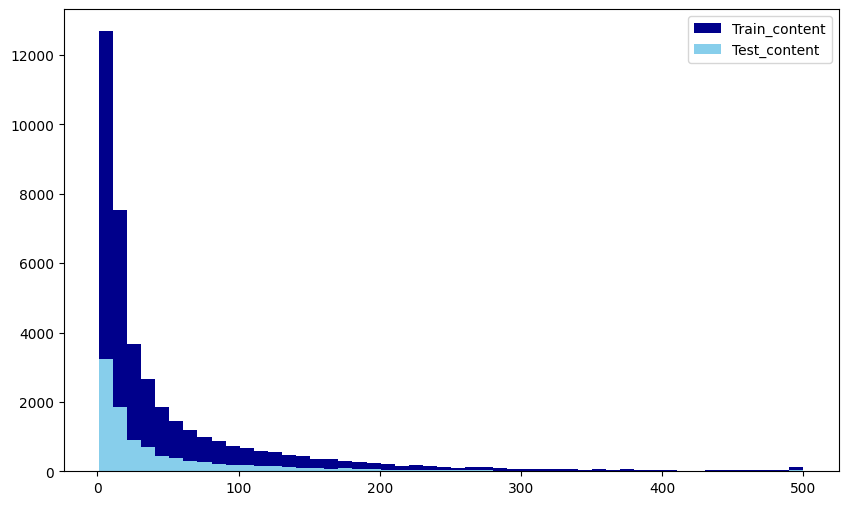

In [13]:
length_train = train_df['content'].str.len()
length_test = test_df['content'].str.len()
plt.figure(figsize=(10,6))
plt.hist(length_train, bins=50, label="Train_content", color = "darkblue")
plt.hist(length_test, bins=50, label='Test_content', color = "skyblue")
plt.legend()

kata-kata yang paling sering muncul dalam dokumen

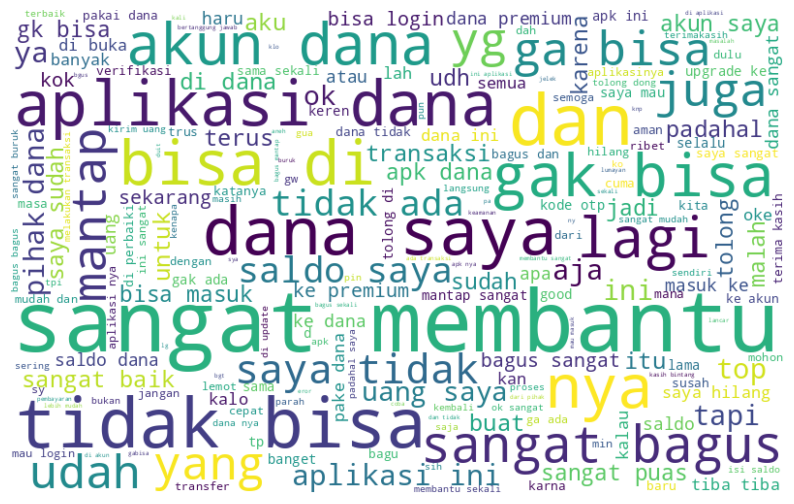

In [14]:
#sentimen yang ada pada seluruh data train dapat dilihat dengan memahami kata yang umum dengan plot word cloud

def wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=120).generate(words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')

all_words = ' '.join([text for text in train_df['content']])
wordCloud(all_words)

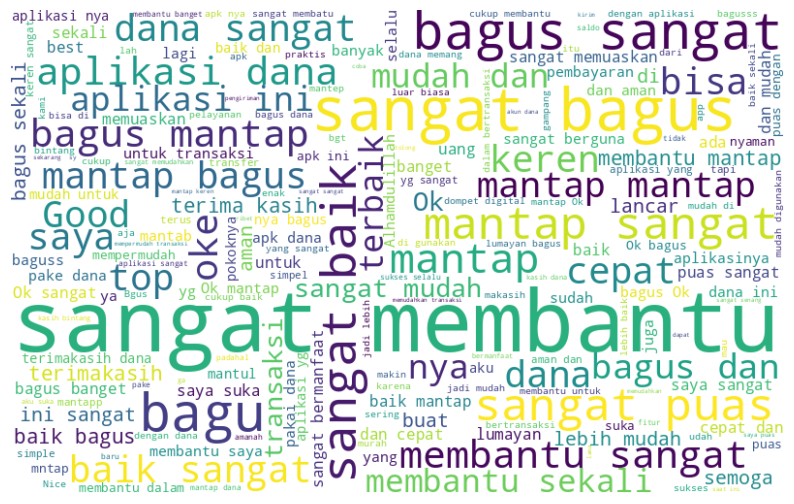

In [15]:
#melihat kata-kata yang positif
positive_words = ' '.join(text for text in train_df['content'][train_df['sentimen'] == 'POSITIVE'])
wordCloud(positive_words)

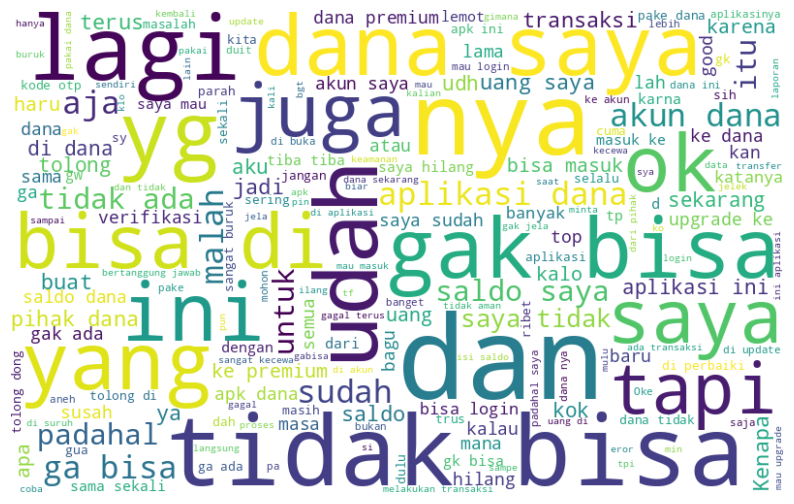

In [16]:
#melihat kata-kata yang negatif
negative_words = ' '.join(text for text in train_df['content'][train_df['sentimen'] == 'NEGATIVE'])
wordCloud(negative_words)

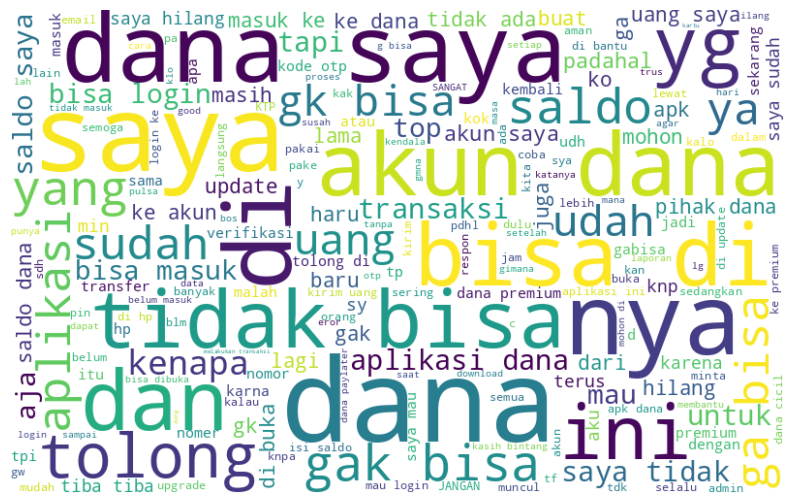

In [17]:
#melihat kata-kata yang neutral
neutral_words = ' '.join(text for text in train_df['content'][train_df['sentimen'] == 'NEUTRAL'])
wordCloud(neutral_words)

Melakukan penghilangan kata umum (stop words) yang tidak memberikan banyak informasi untuk analisis.

In [18]:
stop_words_indonesia = [
    'yang', 'dan', 'di', 'ke', 'dari', 'untuk', 'dengan', 'pada', 'sebagai', 'adalah',
    'ini', 'itu', 'atau', 'saya', 'kamu', 'dia', 'kami', 'mereka', 'nya', 'yg', 'aja'
]

In [19]:
vectorizer_count = CountVectorizer(stop_words=stop_words_indonesia)

positive_counts = vectorizer_count.fit_transform(df[df['sentimen'] == 'POSITIVE']['content'])
positive_word_counts = pd.DataFrame(positive_counts.sum(axis=0), columns=vectorizer_count.get_feature_names_out()).T
positive_word_counts.columns = ['frequency']
positive_word_counts = positive_word_counts.sort_values(by='frequency', ascending=False)

print("Top 10 kata dalam sentimen positif:")
print(positive_word_counts.head(10))

Top 10 kata dalam sentimen positif:
           frequency
sangat          7280
bagus           5263
mantap          3683
membantu        3518
dana            2845
baik            2110
mudah           1488
aplikasi        1434
puas            1243
transaksi        932


In [20]:
negative_counts = vectorizer_count.fit_transform(df[df['sentimen'] == 'NEGATIVE']['content'])
negative_word_counts = pd.DataFrame(negative_counts.sum(axis=0), columns=vectorizer_count.get_feature_names_out()).T
negative_word_counts.columns = ['frequency']
negative_word_counts = negative_word_counts.sort_values(by='frequency', ascending=False)

print("Top 10 kata dalam sentimen negatif:")
print(negative_word_counts.head(10))

Top 10 kata dalam sentimen negatif:
          frequency
dana           8789
bisa           5224
tidak          4423
ada            3730
aplikasi       3171
saldo          2989
mau            2519
gak            2498
uang           2323
sudah          2271


 Mengekstrak n-grams dari teks untuk analisis lebih lanjut

In [21]:
def get_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq

In [22]:
positive_bigrams = get_ngrams(df[df['sentimen'] == 'POSITIVE']['content'], n=3)
print("Top 10 bigram dalam sentimen positif:")
print(positive_bigrams[:10])

Top 10 bigram dalam sentimen positif:
[('sangat membantu sekali', 208), ('sangat bagus dan', 130), ('sangat membantu dan', 128), ('dana sangat membantu', 113), ('sangat membantu dalam', 102), ('sangat membantu saya', 90), ('aplikasi ini sangat', 89), ('bagus sangat membantu', 88), ('ini sangat membantu', 86), ('mudah dan cepat', 84)]


In [23]:
negative_bigrams = get_ngrams(df[df['sentimen'] == 'NEGATIVE']['content'], n=3)
print("Top 10 bigram dalam sentimen negatif:")
print(negative_bigrams[:10])

Top 10 bigram dalam sentimen negatif:
[('akun dana saya', 268), ('saya tidak bisa', 267), ('upgrade ke premium', 252), ('tidak bisa di', 221), ('bisa di buka', 165), ('gak bisa di', 157), ('ke dana premium', 136), ('tidak bisa login', 133), ('dari pihak dana', 126), ('tolong di perbaiki', 122)]


*   Bigram dalam Sentimen Positif: Berdasarkan frekuensi, kita melihat bahwa bigram "sangat membantu sekali" memiliki frekuensi tertinggi dengan 208 kemunculan, diikuti oleh "sangat bagus dan" dan "sangat membantu dan". Mayoritas bigram dalam sentimen positif menyoroti kepuasan pengguna terhadap layanan DANA, dengan menekankan kata-kata positif seperti "membantu", "bagus", dan "mudah".
*   Bigram dalam Sentimen Negatif: Dalam sentimen negatif, bigram yang paling umum adalah "akun dana saya" dengan frekuensi tertinggi 268 kemunculan, diikuti oleh "saya tidak bisa" dan "upgrade ke premium". Bigram ini menunjukkan adanya masalah atau keluhan yang berkaitan dengan pengalaman pengguna yang kurang memuaskan, seperti masalah teknis ("tidak bisa") atau masalah dengan upgrade ke premium.



# Feature Engineering dengan TF-IDF

menggunakan fungsi TfidfVectorizer dari library scikit-learn

In [24]:
#melakukan vektorisasi untuk mengekstrak fitur dengan TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words_indonesia,
                             min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

train_vectors = vectorizer.fit_transform(train_df['content'])
test_vectors = vectorizer.transform(test_df['content'])

# Klasifikasi Sentimen

## Support Vector Machine

In [25]:
# melakukan klasifikasi dengan SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(train_vectors, train_df['sentimen'])
prediction_linear = classifier_linear.predict(test_vectors)

In [26]:
# print metriks
sentimen_names = ['POSITIVE', 'NEGATIVE', 'NEUTRAL']
print(classification_report(test_df['sentimen'], prediction_linear, target_names=sentimen_names))

              precision    recall  f1-score   support

    POSITIVE       0.79      0.86      0.82      3403
    NEGATIVE       0.71      0.46      0.56      1307
     NEUTRAL       0.90      0.92      0.91      5290

    accuracy                           0.84     10000
   macro avg       0.80      0.75      0.76     10000
weighted avg       0.84      0.84      0.83     10000



Prediksi sentimen

In [27]:
content = """saya suka banget pakai dana, i love u"""
content_vector = vectorizer.transform([content])
print(classifier_linear.predict(content_vector))

['POSITIVE']


In [28]:
content = """saya mau transfer, tapi ga bisa terus, gimana sih agak kecewa"""
content_vector = vectorizer.transform([content])
print(classifier_linear.predict(content_vector))

['NEGATIVE']


## Random Forest

In [29]:
# melakukan klasifikasi dengan Random Forest
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_rf.fit(train_vectors, train_df['sentimen'])
prediction_rf = classifier_rf.predict(test_vectors)

In [30]:
# print metriks
sentimen_names = ['Positive', 'Negative', 'Neutral']
print(classification_report(test_df['sentimen'], prediction_rf, target_names=sentimen_names))

              precision    recall  f1-score   support

    Positive       0.75      0.88      0.81      3403
    Negative       0.72      0.34      0.46      1307
     Neutral       0.90      0.92      0.91      5290

    accuracy                           0.83     10000
   macro avg       0.79      0.71      0.73     10000
weighted avg       0.83      0.83      0.82     10000



Prediksi sentimen

In [31]:
content = """saya mau transfer, tapi ga bisa terus, gimana sih agak kecewa"""
content_vector = vectorizer.transform([content])
print(classifier_rf.predict(content_vector))

['NEGATIVE']


In [32]:
content = """saya suka banget pakai dana, i love u"""
content_vector = vectorizer.transform([content])
print(classifier_rf.predict(content_vector))

['POSITIVE']
